In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Import the dataframe and display the first 10 rows.#
df = pd.read_excel('Documents/Capstone Project/AirQualityUCI.xlsx', index_col=None)
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [5]:
#Can you count something interesting?#
#Out of 9357 total observations, how many have a NMHC value greater than 150?#
nmhc = df['NMHC(GT)'] > 150
len(df[nmhc])

454

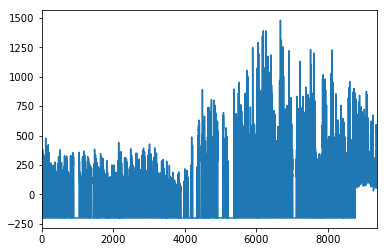

In [6]:
#Can you find some trends?#
#What is the general trend in NOx values over the course of the year?#
nox = df['NOx(GT)']
nox.plot()
plt.show()

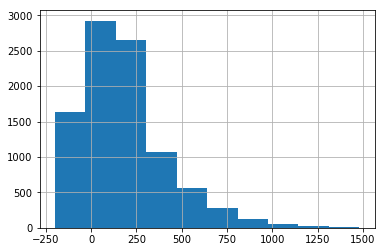

In [7]:
#Can you make a bar plot or a histogram?#
#What is the general distribution of observed NOx values?#
nox.hist()
plt.show()

In [8]:
#Can you compare two related quantities?#
#How do the median NOx and NO2 values compare?#

nox = df['NOx(GT)']
no2 = df['PT08.S4(NO2)']
nox.describe()

count    9357.000000
mean      168.604200
std       257.424561
min      -200.000000
25%        50.000000
50%       141.000000
75%       284.200000
max      1479.000000
Name: NOx(GT), dtype: float64

In [9]:
#Can you compare two related quantities?#
#How do the median NOx and NO2 values compare?#

nox = df['NOx(GT)']
no2 = df['PT08.S4(NO2)']
no2.describe()

count    9357.000000
mean     1391.363266
std       467.192382
min      -200.000000
25%      1184.750000
50%      1445.500000
75%      1662.000000
max      2775.000000
Name: PT08.S4(NO2), dtype: float64

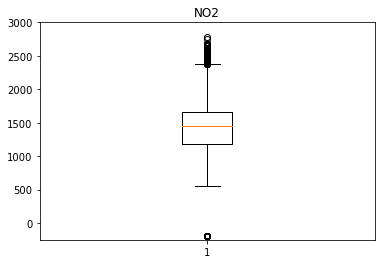

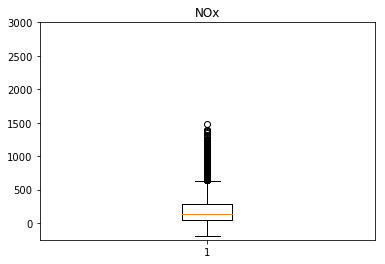

In [10]:
#Can you compare two related quantities?#
#How do the median NOx and NO2 values compare?#
plt.boxplot(no2)
plt.title('NO2')
plt.ylim([-250,3000])
plt.show()

plt.boxplot(nox)
plt.title('NOx')
plt.ylim([-250,3000])
plt.show()

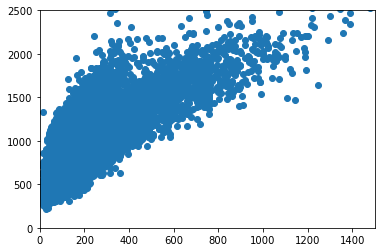

In [11]:
#Can you make a scatterplot?#
#How are NOx and O3 related to each other?#
nox = df['NOx(GT)']
ozone = df['PT08.S5(O3)']
plt.scatter(nox, ozone)
plt.xlim([0,1500])
plt.ylim([0,2500])
plt.show()

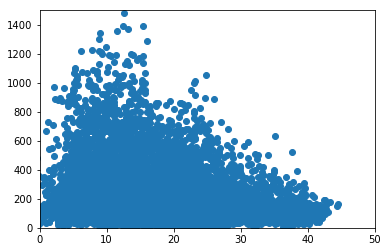

In [14]:
#How are NOx and Temperature related to each other?#
nox = df['NOx(GT)']
temp = df['T']
plt.scatter(temp, nox)
plt.xlim([0,50])
plt.ylim([0,1500])
plt.show()

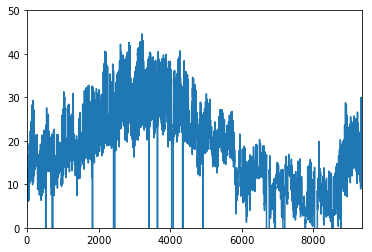

In [13]:
#Can you make a time series plot?#
#Temperature over time#
temp.plot()
plt.ylim([0,50])
plt.show()